<a href="https://colab.research.google.com/github/adammoss/MLiS2/blob/master/intro/backprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let us again attempt to learn the XOR function using the same MLP network,  this time starting with random initial weights and using back-propogation with simple gradient descent.

The error functions for each neuron are
\begin{eqnarray}
\Delta_1^{(2)} &=& {\partial{J} \over \partial a_1^{(2)}}\,, \\
\Delta_1^{(1)} &=&  \Delta_1^{(2)} W_{11}^{(2)}   \Theta ( z_1^{(1)} )  \\
\Delta_2^{(1)} &=&  \Delta_1^{(2)} W_{21}^{(2)}  \Theta ( z_2^{(1)} )  \,,
\end{eqnarray}
since the Heavisde step function $\Theta$ is the derivative of the ReLU activation function.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [0]:
#np.random.seed(0)

In [0]:
num_epochs = 1000
learning_rate = 0.1

In [520]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
print(X)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


In [521]:
Y = np.array([[0], [1], [1], [0]])
print(Y)

[[0]
 [1]
 [1]
 [0]]


In [0]:
class MLP(object):

  def __init__(self):
    # Initialise with random weights
    self.weights_1 = np.random.random(size=(3,2)) - 0.5
    self.weights_2 = np.random.random(size=(3,1)) - 0.5

  def forward(self, x):
    if len(x.shape) == 1:
      # Single example, add a batch dimension of 1
      x = np.expand_dims(x, axis=0)
    # Hidden layer 
    z_1 = np.matmul(np.hstack((np.ones(shape=(x.shape[0], 1)), x)), self.weights_1)
    a_1 = np.maximum(z_1, 0)
    # Output layer
    z_2 = np.matmul(np.hstack((np.ones(shape=(a_1.shape[0], 1)), a_1)), self.weights_2)
    a_2 = z_2
    return z_1, a_1, z_2, a_2

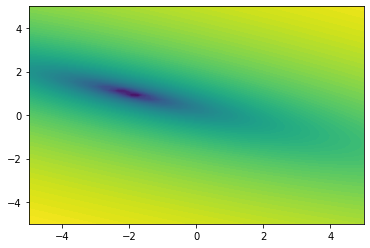

In [541]:
m = MLP()
m.weights_1 = np.array([[0, -1], [1,1], [1,1]], dtype=np.float)
m.weights_2 = np.array([[0], [1], [-2]], dtype=np.float)
# Test loss versus weights
n = 50
test_weights = np.linspace(-5, 5, n)
loss = np.zeros((n, n))
for i in range(n):
  m.weights_2[1, 0] = test_weights[i]
  for j in range(n):
    m.weights_2[2, 0] = test_weights[j]
    z_1, a_1, z_2, a_2 = m.forward(X)
    loss[i, j] = 0.25 * np.sum((a_2 - Y)**2)
plt.contourf(test_weights, test_weights, np.log(loss), levels=100)
plt.show()

In [547]:
m = MLP()
m.weights_1 = np.array([[0, -1], [1,1], [1,1]], dtype=np.float)
m.weights_2 = np.array([[0], [1], [-2]], dtype=np.float) + 0.1 * np.random.normal(size=(3,1))
for epoch in range(num_epochs):
  # Do forward pass
  z_1, a_1, z_2, a_2 = m.forward(X)
  loss = 0.25 * np.sum((a_2 - Y)**2)
  if epoch % 100 == 0:
    print(epoch, loss)
  # Delta_2_1 has shape(4, 1)
  delta_2_1 = 0.5 * a_2 * ( a_2 - Y)
  #print(a_1.shape)
  #print(a_2.shape)
  #print(delta_2_1.shape)
  
  #print(delta_2_1[:, 0] * a_1[:, 1])

  m.weights_2[0, 0] -= learning_rate * np.sum(delta_2_1[:, 0])
  #m.weights_2[1, 0] -= learning_rate * np.sum(delta_2_1[:, 0] * a_1[:, 0])
  #m.weights_2[2, 0] -= learning_rate * np.sum(delta_2_1[:, 0] * a_1[:, 1])

  #print(m.weights_2)

  #loss = 0
  #delta_2_1 = 0
  #delta_1_1 = 0
  #delta_1_2 = 0
  #for i in range(4):
  #  x = X[i, :]
  #  y = Y[i]
  #  z_1, a_1, z_2, a_2 = m.forward(X)
  #  delta = 0.5 * a_2 * ( a_2 - y)
  #  delta_2_1 += delta
  #  #print(delta_2)
  #  delta_1_1 += delta * w[1, 0] * np.heaviside(z_1[0], 0) * a_1[0]
  #  delta_1_2 += delta * w[2, 0] * np.heaviside(z_1[1], 0) * a_1[1]
  #  print(delta_2_1, delta_1_1, delta_1_2)
  #w[0, 0] -= learning_rate * delta_2_1
  #w[1, 0] -= learning_rate * delta_1_1 
  #m.weights_2[2, 0] -= learning_rate * delta_1_2
  

0 0.010126052004300973
100 0.00023237632559576477
200 0.00023237273475949704
300 0.00023237273466784203
400 0.0002323727346678396
500 0.0002323727346678396
600 0.00023237273466783953
700 0.0002323727346678396
800 0.0002323727346678396
900 0.00023237273466783953


In [548]:
print(m.weights_1)

[[ 0. -1.]
 [ 1.  1.]
 [ 1.  1.]]


In [549]:
print(m.weights_2)

[[ 0.02364261]
 [ 0.97589264]
 [-1.99466551]]
